In [1]:
import random
import matplotlib.pyplot as plt
import math

In [2]:
n=512
x=[random.randint(0,640) for i in range(n)]
y=[random.randint(0,480) for i in range(n)]

In [3]:
def distance(i,j):
    return ((x[i]-x[j])**2+(y[i]-y[j])**2)**0.5

def total_distance(v):
    d=0
    for i in range(n-1):
        d+=distance(v[i],v[i+1])
    d+=distance(v[n-1],v[0])
    return d

In [16]:
# ランダム解
v=[i for i in range(n)]
random.shuffle(v)

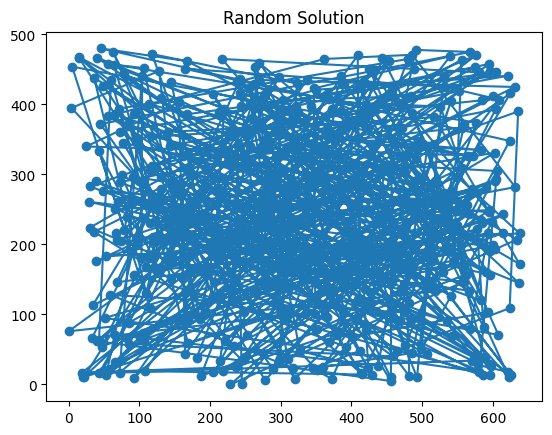

Total distance: 145309.08992069526


In [17]:
plt.clf()
plt.title("Random Solution")
plt.scatter(x,y)
plt.plot([x[v[i]] for i in range(n)]+[x[v[0]]],[y[v[i]] for i in range(n)]+[y[v[0]]])
plt.show()
print("Total distance:",total_distance(v))

In [18]:
start_temp=300
end_temp=0.001
total_iteration=10000000
for cnt in range(total_iteration):
    temp=start_temp+(end_temp-start_temp)*cnt/total_iteration
    if cnt%10000==0:
        print(f"cnt={cnt} temp={temp} total_distance={total_distance(v)}")
    i=random.randint(0,n-1)
    j=random.randint(0,n-1)
    if abs(i-j)<=1 or abs(i-j)>=n-1:
        continue
    dist1=distance(v[(i-1)%n],v[i])+distance(v[i],v[(i+1)%n])+distance(v[(j-1)%n],v[j])+distance(v[j],v[(j+1)%n])
    dist2=distance(v[(i-1)%n],v[j])+distance(v[j],v[(i+1)%n])+distance(v[(j-1)%n],v[i])+distance(v[i],v[(j+1)%n])
    if dist2<dist1:
        v[i],v[j]=v[j],v[i]
    else:
        prob=math.exp((dist1-dist2)/temp)
        if random.random()<prob:
            v[i],v[j]=v[j],v[i]

cnt=0 temp=300.0 total_distance=145309.08992069526
cnt=10000 temp=299.700001 total_distance=120723.26850245951
cnt=20000 temp=299.400002 total_distance=121385.24841884743
cnt=30000 temp=299.100003 total_distance=123864.99786380243
cnt=40000 temp=298.800004 total_distance=122157.00388023665
cnt=50000 temp=298.500005 total_distance=116938.1042121484
cnt=60000 temp=298.200006 total_distance=122067.63297162752
cnt=70000 temp=297.900007 total_distance=119039.62017533043
cnt=80000 temp=297.600008 total_distance=118222.61743127635
cnt=90000 temp=297.300009 total_distance=120778.43868087427
cnt=100000 temp=297.00001 total_distance=120019.47378163927
cnt=110000 temp=296.700011 total_distance=121817.65571332868
cnt=120000 temp=296.400012 total_distance=121344.94130446484
cnt=130000 temp=296.100013 total_distance=113191.76530383798
cnt=140000 temp=295.800014 total_distance=121197.98908338937
cnt=150000 temp=295.500015 total_distance=123502.4688169407
cnt=160000 temp=295.200016 total_distance=1194

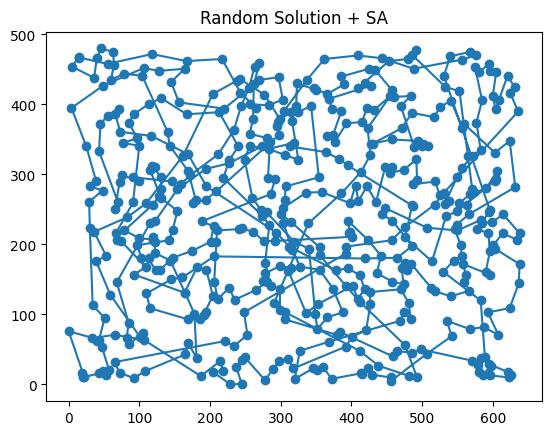

Total Distance: 16398.0594896443


In [19]:
plt.clf()
plt.title("Random Solution + SA")
plt.scatter(x,y)
plt.plot([x[v[i]] for i in range(n)]+[x[v[0]]],[y[v[i]] for i in range(n)]+[y[v[0]]])
plt.show()
print("Total Distance:",total_distance(v))

In [12]:
v=[0]
used=[False for i in range(n)]
used[0]=True
for i in range(n-1):
    best=-1
    for j in range(n):
        if used[j]:
            continue
        if best==-1 or distance(v[i],j)<distance(v[i],best):
            best=j
    v.append(best)
    used[best]=True

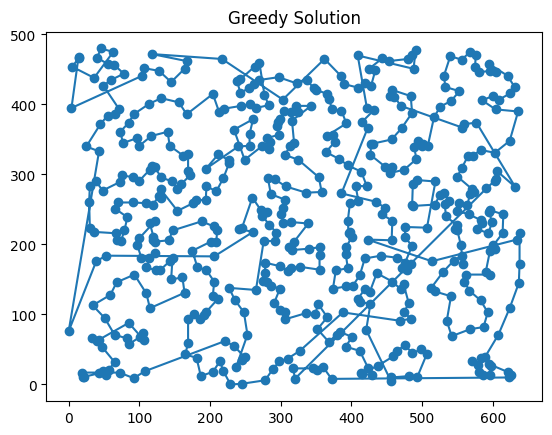

Total Distance: 11613.336202084829


In [13]:
plt.clf()
plt.title("Greedy Solution")
plt.scatter(x,y)
plt.plot([x[v[i]] for i in range(n)]+[x[v[0]]],[y[v[i]] for i in range(n)]+[y[v[0]]])
plt.show()
print("Total Distance:",total_distance(v))

In [14]:
start_temp=10
end_temp=0.001
total_iteration=10000000
for cnt in range(total_iteration):
    temp=start_temp+(end_temp-start_temp)*cnt/total_iteration
    if cnt%10000==0:
        print(f"cnt={cnt} temp={temp} total_distance={total_distance(v)}")
    i=random.randint(0,n-1)
    j=random.randint(0,n-1)
    if abs(i-j)<=1 or abs(i-j)>=n-1:
        continue
    dist1=distance(v[(i-1)%n],v[i])+distance(v[i],v[(i+1)%n])+distance(v[(j-1)%n],v[j])+distance(v[j],v[(j+1)%n])
    dist2=distance(v[(i-1)%n],v[j])+distance(v[j],v[(i+1)%n])+distance(v[(j-1)%n],v[i])+distance(v[i],v[(j+1)%n])
    if dist2<dist1:
        v[i],v[j]=v[j],v[i]
    else:
        prob=math.exp((dist1-dist2)/temp)
        if random.random()<prob:
            v[i],v[j]=v[j],v[i]

cnt=0 temp=10.0 total_distance=11613.336202084829
cnt=10000 temp=9.990001 total_distance=11617.458014990387
cnt=20000 temp=9.980002 total_distance=11631.62307337259
cnt=30000 temp=9.970003 total_distance=11682.684724878765
cnt=40000 temp=9.960004 total_distance=11698.989812347965
cnt=50000 temp=9.950005 total_distance=11748.028471664173
cnt=60000 temp=9.940006 total_distance=11831.00683625775
cnt=70000 temp=9.930007 total_distance=11958.958061331252
cnt=80000 temp=9.920008 total_distance=11932.61493611767
cnt=90000 temp=9.910009 total_distance=11949.965996705389
cnt=100000 temp=9.90001 total_distance=11892.102380983082
cnt=110000 temp=9.890011 total_distance=11829.37593696741
cnt=120000 temp=9.880012 total_distance=11888.787429072861
cnt=130000 temp=9.870013 total_distance=11955.388695951126
cnt=140000 temp=9.860014 total_distance=12018.481485207301
cnt=150000 temp=9.850015 total_distance=12099.098746039881
cnt=160000 temp=9.840016 total_distance=12152.902363329264
cnt=170000 temp=9.83

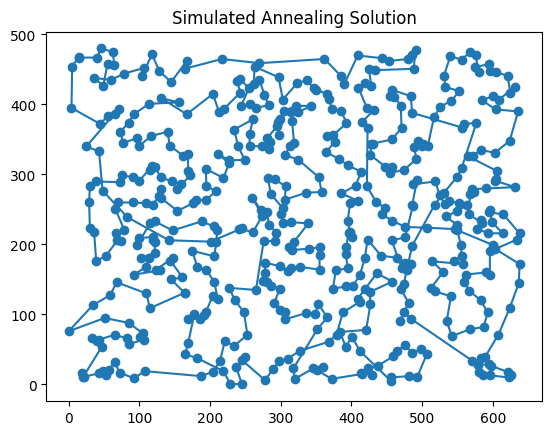

In [15]:
plt.clf()
plt.title("Simulated Annealing Solution")
plt.scatter(x,y)
plt.plot([x[v[i]] for i in range(n)]+[x[v[0]]],[y[v[i]] for i in range(n)]+[y[v[0]]])
plt.show()